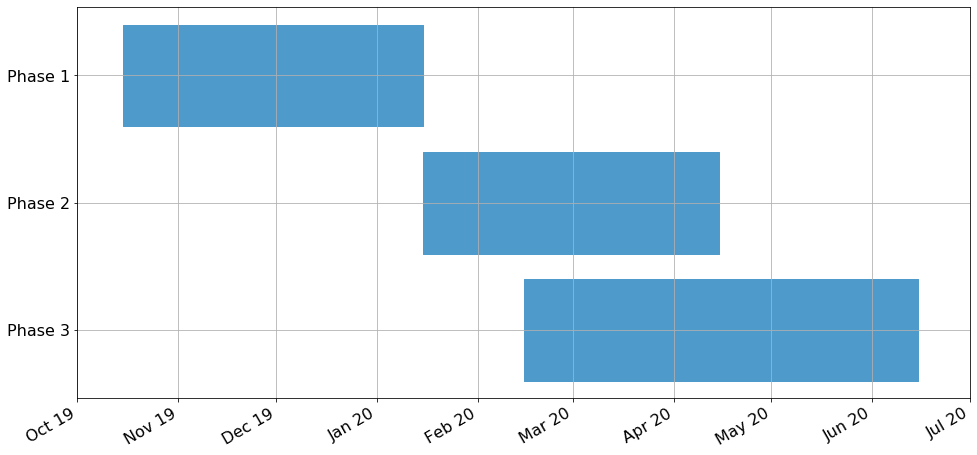

In [127]:
%matplotlib inline
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.dates
from matplotlib.dates import WEEKLY,MONTHLY, DateFormatter, rrulewrapper, RRuleLocator 
import numpy as np
import matplotlib as mpl
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

from collections import OrderedDict

blues = mpl.cm.get_cmap(plt.get_cmap('Blues'))
greens = mpl.cm.get_cmap(plt.get_cmap('Greens'))
reds = mpl.cm.get_cmap(plt.get_cmap('Reds'))
oranges = mpl.cm.get_cmap(plt.get_cmap('Oranges'))
purples = mpl.cm.get_cmap(plt.get_cmap('Purples'))
greys = mpl.cm.get_cmap(plt.get_cmap('Greys'))


def gantt(task=None, start=None, finish=None, **kwargs):
    """ Plot a gantt chart.
    """

    if 'task_type' in kwargs:
        task_type = kwargs['task_type']
    if 'color' in kwargs:
        color = kwargs['color']
    if 'fontsize' in kwargs:
        fontsize = kwargs['fontsize']
    if 'axes' in kwargs:
        ax = kwargs['axes']
    else:
        ax = plt.gca()
        
    d0 = datetime(1, 1, 1)    
    USES_DATES = False    
    if np.issubdtype(start.dtype, np.datetime64):
        start_date = start.min().to_pydatetime() - d0
        start = mdates.date2num(start)
        USES_DATES = True
    if np.issubdtype(finish.dtype, np.datetime64):
        end_date = finish.max().to_pydatetime() - d0
        finish = mdates.date2num(finish)
        
    delta = finish-start

    labels = []
    
    # TODO: refactor?    
    encoded_tasks = OrderedDict()
    k = 0
    for n in task:
        if not n in encoded_tasks:
            encoded_tasks[n] = k
            k+=1
            
    labels = list(encoded_tasks)
    for i, task in enumerate(task):
        j=encoded_tasks[task]
        if color:
            c = color[task_type[i]] 
        else:
            c = None
        ax.broken_barh([(start[i], delta[i])], (j-0.4,0.8), color=c)

    # Set yticks
    ax.set_yticks(range(len(labels)))
    ax.set_yticklabels(labels,fontsize=fontsize) 
    #ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
    ax.grid('on')
    # Set xticks formatting
    # TODO: use matplotlib.dates.AutoDateFormatter
    if USES_DATES:
        d0 = datetime(1, 1, 1)
        d1 = [datetime(2019, 10, 1),
              datetime(2019, 11, 1),
              datetime(2019, 12, 1),
              datetime(2020, 1, 1),
              datetime(2020, 2, 1),
              datetime(2020, 3, 1),
              datetime(2020, 4, 1),
              datetime(2020, 5, 1),
              datetime(2020, 6, 1),
              datetime(2020, 7, 1)]
        deltas = list()
        for some_date in d1:
            delta = some_date - d0
            deltas.append(delta.days + 1)
        ax.set_xticks(deltas)
        ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %-y'))
        fig = plt.gcf()
        fig.autofmt_xdate()

    ax.invert_yaxis()

phd_df = pd.read_csv('phd.csv', parse_dates=['Start','Finish'])

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(16,8))

gantt(task=phd_df.Task, start=phd_df.Start, finish=phd_df.Finish, task_type=phd_df.Type, color={"main": blues(150), "sub":"lightgreen"}, fontsize=16, axes=axes)

fig.savefig('figures/phd_plan.pdf',dpi=800,bbox_inches='tight')
fig.savefig('figures/phd_plan.png',dpi=800,bbox_inches='tight')


In [117]:
from datetime import datetime

delta = d1 - d0
print(delta.days+ 1)
delta = phd_df.Finish.max().to_pydatetime() - d0
dir(delta)

TypeError: unsupported operand type(s) for -: 'list' and 'datetime.datetime'

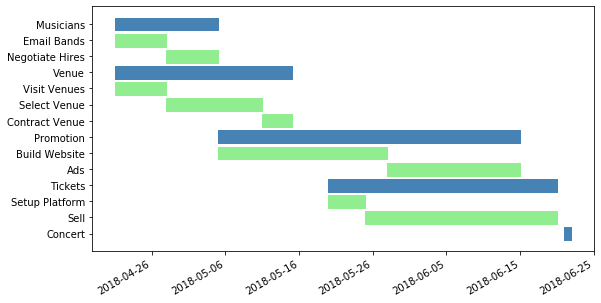

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from collections import OrderedDict

def gantt(task=None, start=None, finish=None, **kwargs):
    """ Plot a gantt chart.
    """

    if 'task_type' in kwargs:
        task_type = kwargs['task_type']
    if 'color' in kwargs:
        color = kwargs['color']
    
    USES_DATES = False    
    if np.issubdtype(start.dtype, np.datetime64):
        start = mdates.date2num(start)
        USES_DATES = True
    if np.issubdtype(finish.dtype, np.datetime64):
        finish = mdates.date2num(finish)

    delta = finish-start

    ax = plt.gca()

    labels = []
    
    # TODO: refactor?    
    encoded_tasks = OrderedDict()
    k = 0
    for n in task:
        if not n in encoded_tasks:
            encoded_tasks[n] = k
            k+=1
            
    labels = list(encoded_tasks)
    for i, task in enumerate(task):
        j=encoded_tasks[task]
        if color:
            c = color[task_type[i]] 
        else:
            c = None
        ax.broken_barh([(start[i], delta[i])], (j-0.4,0.8), color=c)

    # Set yticks
    ax.set_yticks(range(len(labels)))
    ax.set_yticklabels(labels) 

    # Set xticks formatting
    # TODO: use matplotlib.dates.AutoDateFormatter
    if USES_DATES:
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        fig = plt.gcf()
        fig.autofmt_xdate()

    ax.invert_yaxis()

df = pd.read_csv('concert.csv', parse_dates=['Start','Finish'])

fig = plt.figure(figsize=(9,5))

gantt(task=df.Task, start=df.Start, finish=df.Finish, 
      task_type=df.Type, color={"main":"steelblue", "sub":"lightgreen"})
